# DATA PREPROCESSING

# Set-Up Environment

In [7]:
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import math
import re
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset

In [2]:
data = pd.read_csv('/content/drive/MyDrive/CN/feature.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.drop(columns='has_ip', inplace=True)
data.drop(columns='urlIsLive', inplace=True)

# Changing Target Variable Names

In [3]:
data.replace('Benign_list_big_final', "Benign", inplace=True)
data.replace('DefacementSitesURLFiltered', "Defacement", inplace=True)
data.replace('Malware_dataset', "Malware", inplace=True)
data.replace('phishing_dataset', "Phishing", inplace=True)
data.replace('spam_dataset', "Spam", inplace=True)

In [5]:
grouped_df = data.groupby("File")
mean_df = grouped_df.mean()

# Standardization

In [8]:
x = mean_df.values
min_max_scaler = StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
mean_d = pd.DataFrame(x_scaled)

# Seperating Data for Different Classes

In [9]:
ben = mean_d.iloc[0].to_numpy()
defa = mean_d.iloc[1].to_numpy()
mal = mean_d.iloc[2].to_numpy()
phis = mean_d.iloc[3].to_numpy()
spam = mean_d.iloc[4].to_numpy()

In [10]:
col = data.columns[1:]

# Plot Showing Variation of Features for Different Types of URLs

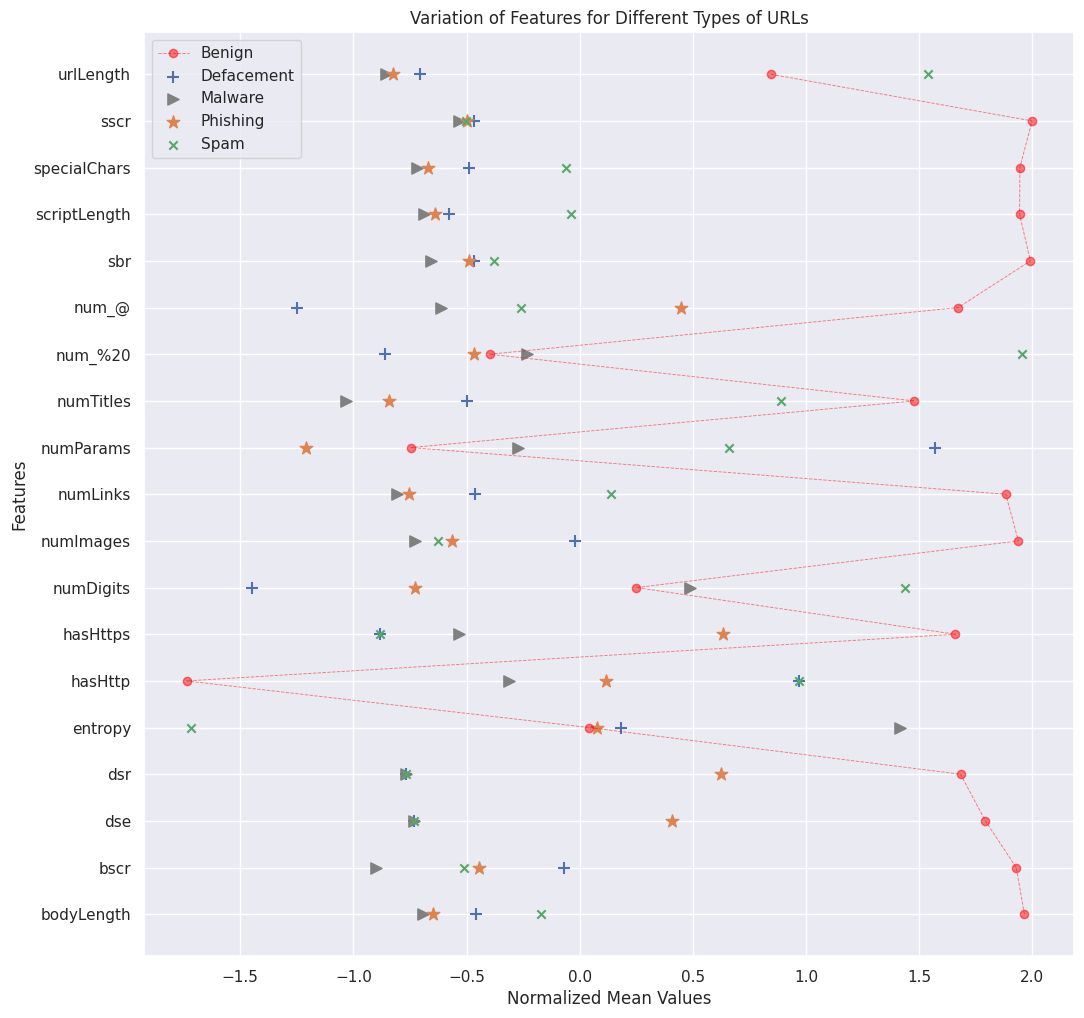

In [11]:
plt.figure(figsize=(12, 12))
plt.plot(ben, col, color='red', marker='o', linewidth=0.65, linestyle="--", alpha=0.5)
plt.scatter(defa, col, marker='+', s=80)
plt.scatter(mal, col, color='grey', marker='>', s=65)
plt.scatter(phis, col, marker='*', s=90)
plt.scatter(spam, col, marker='x')
plt.legend(['Benign', 'Defacement', 'Malware', 'Phishing', 'Spam'])
plt.title("Variation of Features for Different Types of URLs")
plt.ylabel("Features")
plt.xlabel("Normalized Mean Values")
plt.savefig('Feature_Plot.png')
plt.show()

# Heatmap Showing Correlation between Features

<ipython-input-12-161ced753613>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


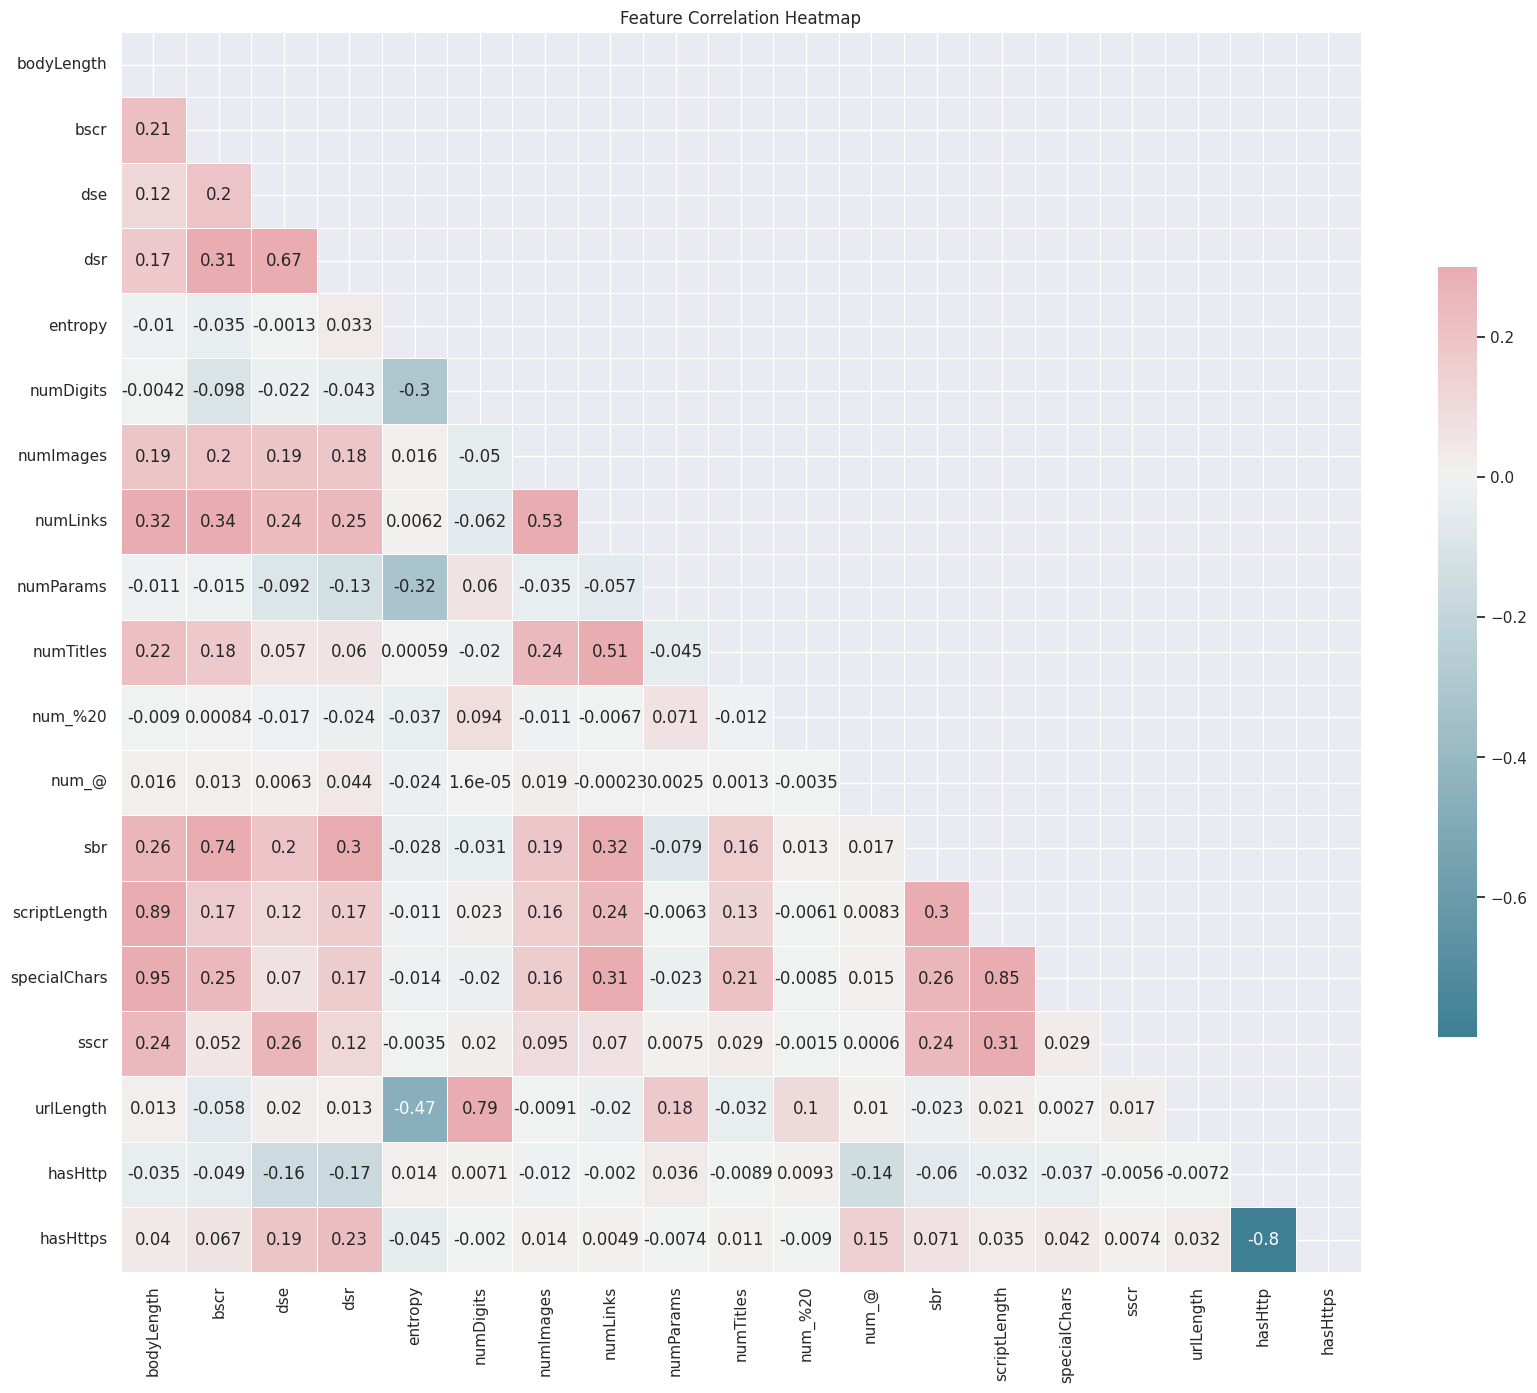

In [12]:
objects = [i for i in data.columns if 'object' in str(data.dtypes[i])]
booleans = [i for i in data.columns if 'bool' in str(data.dtypes[i])]
ints = [i for i in data.columns if 'int' in str(data.dtypes[i]) or 'float' in str(data.dtypes[i])]

corr = data[ints + booleans].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title("Feature Correlation Heatmap")
plt.savefig('Feature_Corr.png')
plt.show()